In [416]:
library(dplyr)
library(ggplot2)

df.hbw <- read.csv(paste("C:/Users/saavedrak/Desktop/",
                     "USP_587_data/HW2/household_hbw.csv", sep=""))
df.hia <- read.csv(paste("C:/Users/saavedrak/Desktop/",
                     "USP_587_data/HW2/2010_hia.csv", sep=""))

In [427]:
df.resveh <- df.hbw %>%
    select(resty, hhveh, htrips) %>%
    filter(resty <7 ) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(resty, hhveh) 

df.resveh.sum <- summarize(df.resveh, count=n(), avg_trips = mean(htrips))
df.resveh.sum

resty,hhveh,count,avg_trips
1,0,90,8.222222
1,1,1203,7.142145
1,2,2351,11.220757
1,3,1498,11.864486
2,0,26,10.576923
2,1,110,6.881818
2,2,39,11.153846
2,3,13,15.461538
3,0,219,7.716895
3,1,613,6.905383


In [432]:
resty1 <- ifelse(df.resveh$resty == 1 , 1, 0)
resty2 <- ifelse(df.resveh$resty == 2 , 1, 0)
resty3 <- ifelse(df.resveh$resty == 3 , 1, 0)
resty4 <- ifelse(df.resveh$resty == 4 , 1, 0)

df.resveh$resty1 <- resty1
df.resveh$resty2 <- resty2
df.resveh$resty3 <- resty3
df.resveh$resty4 <- resty4

ln.restyveh <- lm(htrips ~ hhveh + resty1 + resty2 + resty3, data=df.resveh)
summary(ln.restyveh)


Call:
lm(formula = htrips ~ hhveh + resty1 + resty2 + resty3, data = df.resveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.275  -5.359  -1.530   3.641  68.725 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0032     0.7541   3.983 6.89e-05 ***
hhveh         1.9166     0.1247  15.374  < 2e-16 ***
resty1        3.5223     0.7459   4.722 2.38e-06 ***
resty2        3.5549     0.9198   3.865 0.000112 ***
resty3        2.6102     0.7740   3.372 0.000750 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.593 on 6432 degrees of freedom
Multiple R-squared:  0.05804,	Adjusted R-squared:  0.05745 
F-statistic: 99.07 on 4 and 6432 DF,  p-value: < 2.2e-16


ERROR while rich displaying an object: Error: Continuous value supplied to discrete scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. lapply(data, scales_train_df, scal

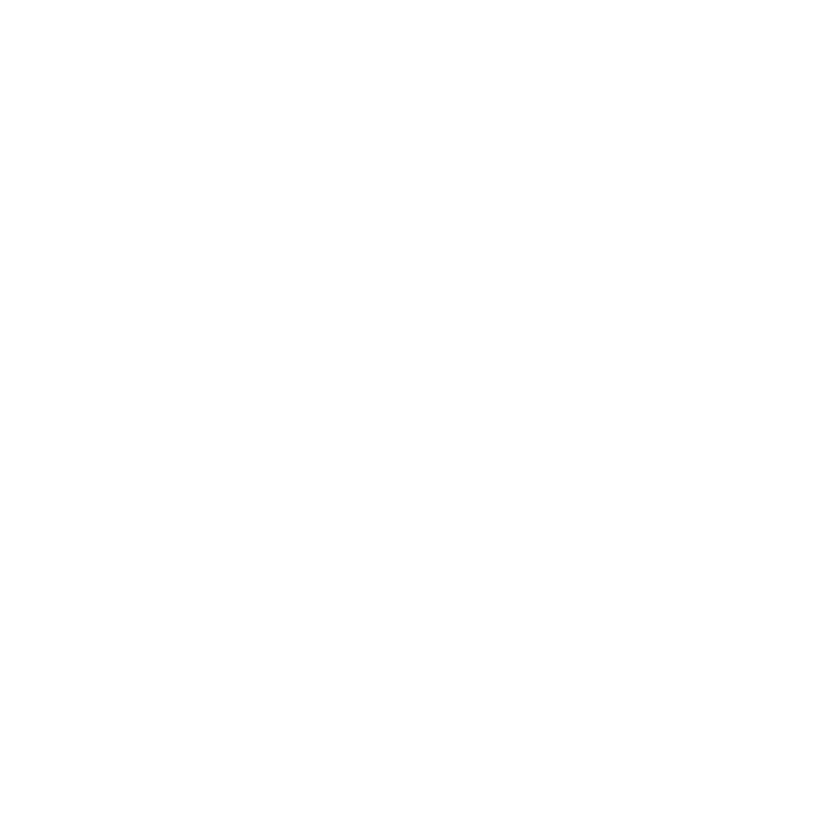

In [434]:
df.resveh.sum %>%
    ggplot(aes(x=hhveh, y=avg_trips, color=resty, group=resty)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhveh, y=avg_trips, color=hhveh), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by HH Size and HH Vehicles") +
    scale_color_brewer(palette="Dark2")

In [ ]:
data <- data.frame(resty = 4, hhveh=2)
predict(lnveh, data, interval="predict")

##  AVG TRIPS by HHSize

In [422]:
df.persveh <- df.hbw %>%
    select(hhsiz, hhveh, htrips) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=4, 
                          `6`=4, `7`=4, `8`=4)) %>%
    
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(hhsiz, hhveh) 

df.persveh.sum <- summarize(df.persveh, count=n(), 
                            avg_trips = mean(htrips)) %>%
    transform(grouping = interaction(hhsiz, hhveh, sep='-'))
df.persveh.sum

hhsiz,hhveh,count,avg_trips,grouping
1,0,259,6.467181,1-0
1,1,1177,4.361088,1-1
1,2,218,4.463303,1-2
1,3,70,4.642857,1-3
2,0,53,9.754717,2-0
2,1,517,8.305609,2-1
2,2,1263,7.828187,2-2
2,3,636,7.665094,2-3
3,0,23,14.000000,3-0
3,1,164,12.713415,3-1


In [423]:
fit <- lm(avg_trips ~ hhsiz + hhveh, data=df.persveh.sum)
print(fit)
summary(fit)
data <- data.frame(hhsiz=1, hhveh=1)
predict(fit, data, interval="predict")


Call:
lm(formula = avg_trips ~ hhsiz + hhveh, data = df.persveh.sum)

Coefficients:
(Intercept)        hhsiz        hhveh  
     0.5699       4.5876      -0.5729  




Call:
lm(formula = avg_trips ~ hhsiz + hhveh, data = df.persveh.sum)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5432 -0.7949 -0.2096  0.8374  1.8348 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5699     0.7608   0.749   0.4672    
hhsiz         4.5876     0.2437  18.828 8.13e-11 ***
hhveh        -0.5729     0.2437  -2.351   0.0351 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.09 on 13 degrees of freedom
Multiple R-squared:  0.9651,	Adjusted R-squared:  0.9598 
F-statistic:   180 on 2 and 13 DF,  p-value: 3.345e-10


,fit,lwr,upr
1,4.584514,2.019174,7.149853


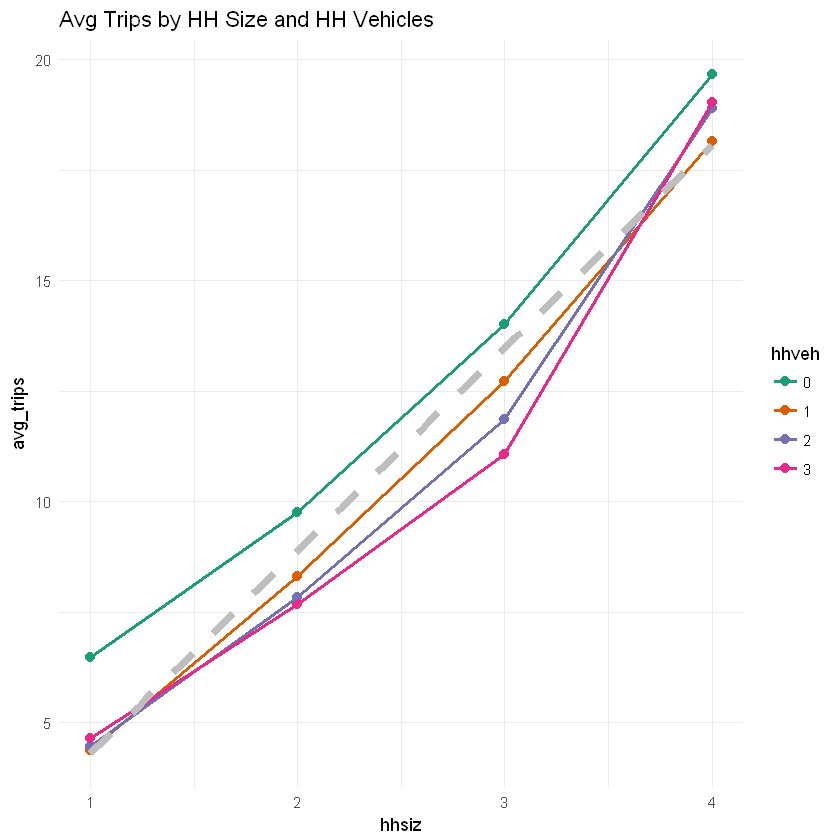

In [424]:
df.persveh.sum$ hhveh <- as.factor(df.persveh.sum$hhveh)

df.persveh.sum %>%
    ggplot(aes(x=hhsiz, y=avg_trips, color=hhveh, group=hhveh)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhsiz, y=avg_trips, color=hhveh), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by HH Size and HH Vehicles") +
    scale_color_brewer(palette="Dark2")